In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, END, START

In [11]:
class MultiConditionalAgentState(TypedDict):
    number1:int
    number2:int 
    operation1: str
    finalNumber: int
    number3:int
    number4:int
    operation2: str
    finalNumber2: int
    

In [19]:
def adder(state: MultiConditionalAgentState) -> MultiConditionalAgentState:
    """This node adds the 2 numbers"""
    state['finalNumber'] = state['number1'] + state['number2'] 
    return state

def multiplier(state: MultiConditionalAgentState) -> MultiConditionalAgentState:
    """This node multiplies the 2 numbers"""    
    state['finalNumber'] = state['number1'] * state['number2'] 
    return state

def adder2(state: MultiConditionalAgentState) -> MultiConditionalAgentState:
    """This node adds the 2 numbers"""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def multiplier2(state: MultiConditionalAgentState) -> MultiConditionalAgentState:
    """This node multiplies the 2 numbers"""    
    state['finalNumber2'] = state['number3'] * state['number4'] 
    return state

def decide_next_node1(state: MultiConditionalAgentState) -> MultiConditionalAgentState:
    """This node will select the next node of the graph """
    if state['operation1'] == "+":
        return "addition_operation"
    elif state['operation1'] == "*":
        return "multiplier_operation"

def decide_next_node2(state: MultiConditionalAgentState) -> MultiConditionalAgentState:
    """This node will select the next node of the graph """
    if state['operation2'] == "+":
        return "addition_operation2"
    elif state['operation2'] == "*":
        return "multiplier_operation2"
    


In [20]:
graph = StateGraph(MultiConditionalAgentState)

graph.add_node("add_node", adder)
graph.add_node("multiplier_node", multiplier)
graph.add_node("add_node2", adder2)
graph.add_node("multiplier_node2", multiplier2)
graph.add_node("router1", lambda state: state) # passthrough fucntion
graph.add_node("router2", lambda state: state) # passthrough fucntion


graph.add_edge(START, "router1")

graph.add_conditional_edges("router1", decide_next_node1, path_map={"addition_operation": "add_node", "multiplier_operation": "multiplier_node"})

graph.add_edge("add_node", "router2")
graph.add_edge("multiplier_node", "router2")

graph.add_conditional_edges("router2", decide_next_node2, path_map={"addition_operation2": "add_node2", "multiplier_operation2": "multiplier_node2"})

graph.add_edge("add_node2", END)
graph.add_edge("multiplier_node2", END)

app = graph.compile()


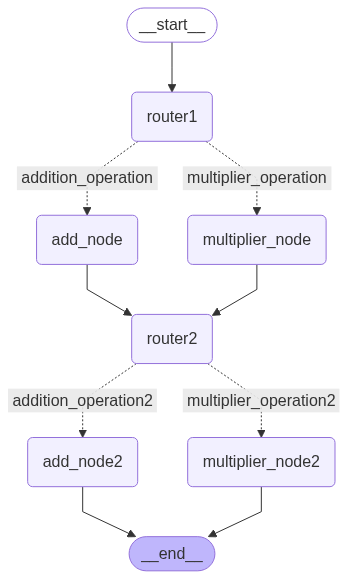

In [21]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
result= app.invoke({"number1": 2, "number2": 3, "number3": 4, "number4": 5, "operation1": "+", "operation2": "*"})
print(result)

{'number1': 2, 'number2': 3, 'number3': 4, 'number4': 5, 'operation1': '+', 'operation2': '*', 'finalNumber': 5, 'finalNumber2': 20}
